<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_Naturallanguage_study/blob/main/tensorflow_naturallanguage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# bbc-text.csv
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 78.3MB/s]


In [23]:
vocab_size = 1000 
embedding_dim = 16 
max_length = 120 
trunc_type='post'  
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [32]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [33]:
with open("./bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for i in reader:
      labels.append(i[0])
      sentence=i[1]
      #stopwordsに該当する文字が入っている場合は取り除く
      for word in stopwords:
        token=' '+word+' '
        sentence=sentence.replace(token," ")
      sentences.append(sentence)

In [34]:
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [35]:
#学習するデータを何%にするか
train_size = int(len(sentences) * training_portion) 
train_sentences = sentences[:train_size] 
train_labels = labels[:train_size]

#検証するデータを何%にするか
validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:] 

In [40]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index=tokenizer.word_index

train_sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,padding=padding_type)

In [46]:
print(train_sequences[1])
print(train_padded[1])

[1, 573, 234, 1, 1, 129, 1, 573, 1, 1, 689, 1, 1, 1, 1, 766, 275, 30, 1, 1, 1, 29, 1, 349, 1, 30, 800, 1, 860, 1, 1, 6, 1, 5, 1, 1, 2, 363, 192, 51, 1, 617, 1, 588, 1, 1, 1, 75, 2, 283, 6, 1, 111, 1, 1, 766, 1, 1, 471, 860, 1, 1, 1, 1, 1, 1, 1, 835, 1, 421, 6, 1, 364, 1, 6, 1, 26, 1, 203, 5, 1, 6, 1, 1, 364, 188, 6, 1, 26, 1, 1, 1, 1, 6, 1, 1, 25, 1, 1, 6, 1, 774, 1, 1, 1, 1, 1, 129, 1, 126, 321, 1, 1, 1, 860, 1, 498, 1, 6, 1, 774, 766, 4, 1, 255, 557, 1, 378, 1, 2, 1, 270, 694, 6, 1, 149, 736, 334, 1, 1, 573, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 653, 1, 1, 577, 1, 1, 2, 363, 1, 87, 529, 819, 1, 1, 1, 625, 75, 1, 1, 1, 268, 1, 241, 37, 791, 268, 401, 6, 1, 557, 102, 14, 18, 125, 210, 1, 129, 1, 1, 1, 1, 1, 1, 1, 1]
[  1 573 234 ...   0   0   0]


In [47]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length) 

In [64]:
print(labels[0])
print(labels[1])
print(labels[2])
print(labels[3])
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq[3])
print(training_label_seq.shape)
print(validation_label_seq.shape)

tech
business
sport
sport
[4]
[2]
[1]
[1]
(1780, 1)
(445, 1)


In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [68]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 0s - loss: 0.2866 - accuracy: 0.9421 - val_loss: 2.7052 - val_accuracy: 0.7213
Epoch 2/30
56/56 - 0s - loss: 0.2773 - accuracy: 0.9410 - val_loss: 2.7052 - val_accuracy: 0.7213
Epoch 3/30
56/56 - 0s - loss: 0.2729 - accuracy: 0.9421 - val_loss: 2.6894 - val_accuracy: 0.7236
Epoch 4/30
56/56 - 0s - loss: 0.2653 - accuracy: 0.9461 - val_loss: 2.7053 - val_accuracy: 0.7258
Epoch 5/30
56/56 - 0s - loss: 0.2564 - accuracy: 0.9489 - val_loss: 2.6809 - val_accuracy: 0.7281
Epoch 6/30
56/56 - 0s - loss: 0.2518 - accuracy: 0.9483 - val_loss: 2.7169 - val_accuracy: 0.7281
Epoch 7/30
56/56 - 0s - loss: 0.2449 - accuracy: 0.9466 - val_loss: 2.7149 - val_accuracy: 0.7281
Epoch 8/30
56/56 - 0s - loss: 0.2369 - accuracy: 0.9511 - val_loss: 2.7434 - val_accuracy: 0.7303
Epoch 9/30
56/56 - 0s - loss: 0.2320 - accuracy: 0.9517 - val_loss: 2.7289 - val_accuracy: 0.7303
Epoch 10/30
56/56 - 0s - loss: 0.2265 - accuracy: 0.9500 - val_loss: 2.6982 - val_accuracy: 0.7326
Epoch 11/30
56/56 -

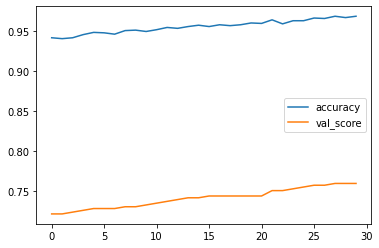

In [77]:
import matplotlib.pyplot as plt
data=history.history
plt.plot(data['accuracy'],label='accuracy')
plt.plot(data['val_accuracy'],label='val_score')
plt.legend()
plt.show()